# Knn Classifier

In [3]:
import pandas as pd
import seaborn as sns, numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from sklearn.cluster import KMeans
import os, shutil, glob, os.path
from PIL import Image as pil_image

Using TensorFlow backend.


In [6]:
# load VGG16 model

image.LOAD_TRUNCATED_IMAGES = True 
model = VGG16(weights='imagenet', include_top=False)

In [7]:
df = pd.read_csv('imageDataSet.csv')
df.head()

,1109,1111,1621,1623,2133,4693,4695,5193,5207,5319,...,23460,23484,23739,25230,25275,25742,26254,26556,27068,Target
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,54.366787,0.000000,0.000000,...,97.608917,14.459713,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1
1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.201546,0.000000,0.585434,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1
2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,25.582216,0.000000,0.000000,...,86.273682,17.683262,4.178553,13.121740,31.260714,3.847086,0.000000,0.0,0.000000,1
3,2.802592,0.000000,2.419251,0.0,25.850954,8.406624,3.889212,1.309759,14.579442,60.298489,...,155.205734,62.641945,0.000000,0.000000,1.351078,0.000000,0.000000,0.0,18.597864,1
4,13.896986,47.963455,17.366030,0.0,34.872738,18.890219,66.620743,0.000000,76.196136,90.715256,...,278.565826,110.468735,36.941467,124.530258,13.457292,123.339584,35.146267,0.0,0.000000,1


In [8]:
df.describe()

,1109,1111,1621,1623,2133,4693,4695,5193,5207,5319,...,23460,23484,23739,25230,25275,25742,26254,26556,27068,Target
count,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,...,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000
mean,4.482261,3.756539,4.618639,5.845988,4.446603,4.809016,4.121811,13.925684,5.762872,5.173511,...,27.190324,15.555807,7.947317,8.496846,9.333330,9.810816,8.103393,13.237347,13.088354,0.281607
std,13.162848,13.213956,13.535185,18.831152,13.386442,13.601924,14.545853,24.796943,18.664735,16.493545,...,44.652915,25.683744,18.259517,22.932876,21.628484,24.960158,23.178258,23.319883,23.298747,0.449885
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.602344,0.000000,0.000000,...,41.782183,22.360950,4.628346,0.000000,5.408501,0.000000,0.000000,18.587821,17.735898,1.000000
max,122.220444,116.553886,100.364479,144.560501,110.275520,117.025200,177.059372,175.948578,177.740250,147.352890,...,306.928009,162.855591,127.336914,179.900589,174.718369,169.688080,225.921432,187.903152,189.659103,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1109    2191 non-null   float64
 1   1111    2191 non-null   float64
 2   1621    2191 non-null   float64
 3   1623    2191 non-null   float64
 4   2133    2191 non-null   float64
 5   4693    2191 non-null   float64
 6   4695    2191 non-null   float64
 7   5193    2191 non-null   float64
 8   5207    2191 non-null   float64
 9   5319    2191 non-null   float64
 10  8683    2191 non-null   float64
 11  8777    2191 non-null   float64
 12  9170    2191 non-null   float64
 13  9200    2191 non-null   float64
 14  9289    2191 non-null   float64
 15  9392    2191 non-null   float64
 16  9636    2191 non-null   float64
 17  9692    2191 non-null   float64
 18  10148   2191 non-null   float64
 19  10204   2191 non-null   float64
 20  10660   2191 non-null   float64
 21  10825   2191 non-null   float64
 22  

In [16]:
df.describe()

,1109,1111,1621,1623,2133,4693,4695,5193,5207,5319,...,23004,23460,23484,23739,25230,25275,25742,26254,26556,27068
count,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,...,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000
mean,4.482261,3.756539,4.618639,5.845988,4.446603,4.809016,4.121811,13.925684,5.762872,5.173511,...,16.636498,27.190324,15.555807,7.947317,8.496846,9.333330,9.810816,8.103393,13.237347,13.088354
std,13.162848,13.213956,13.535185,18.831152,13.386442,13.601924,14.545853,24.796943,18.664735,16.493545,...,42.213097,44.652915,25.683744,18.259517,22.932876,21.628484,24.960158,23.178258,23.319883,23.298747
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.602344,0.000000,0.000000,...,4.994383,41.782183,22.360950,4.628346,0.000000,5.408501,0.000000,0.000000,18.587821,17.735898
max,122.220444,116.553886,100.364479,144.560501,110.275520,117.025200,177.059372,175.948578,177.740250,147.352890,...,365.912354,306.928009,162.855591,127.336914,179.900589,174.718369,169.688080,225.921432,187.903152,189.659103


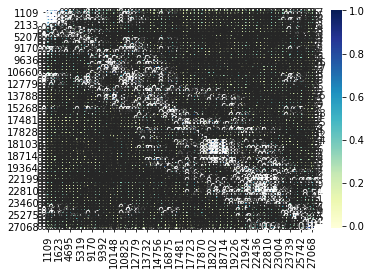

In [19]:
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True)

## Remove target from dataframe

In [14]:
target = df[['Target']]
df.drop('Target',axis=1,inplace=True)

df.head()

,1109,1111,1621,1623,2133,4693,4695,5193,5207,5319,...,23004,23460,23484,23739,25230,25275,25742,26254,26556,27068
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,54.366787,0.000000,0.000000,...,0.000000,97.608917,14.459713,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.201546,0.000000,0.585434,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,25.582216,0.000000,0.000000,...,0.000000,86.273682,17.683262,4.178553,13.121740,31.260714,3.847086,0.000000,0.0,0.000000
3,2.802592,0.000000,2.419251,0.0,25.850954,8.406624,3.889212,1.309759,14.579442,60.298489,...,22.180500,155.205734,62.641945,0.000000,0.000000,1.351078,0.000000,0.000000,0.0,18.597864
4,13.896986,47.963455,17.366030,0.0,34.872738,18.890219,66.620743,0.000000,76.196136,90.715256,...,25.414454,278.565826,110.468735,36.941467,124.530258,13.457292,123.339584,35.146267,0.0,0.000000


## Normalize and split dataframe

In [17]:
# Normalize dataset

for col in df.columns:
    scaler = MinMaxScaler()
    normalized = scaler.fit_transform(df[[col]].values.astype(float))

    df[[col]] = normalized


df.describe()

,1109,1111,1621,1623,2133,4693,4695,5193,5207,5319,...,23004,23460,23484,23739,25230,25275,25742,26254,26556,27068
count,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,...,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000
mean,0.036674,0.032230,0.046019,0.040440,0.040323,0.041094,0.023279,0.079146,0.032423,0.035110,...,0.045466,0.088589,0.095519,0.062412,0.047231,0.053419,0.057817,0.035868,0.070448,0.069010
std,0.107698,0.113372,0.134860,0.130265,0.121391,0.116231,0.082152,0.140933,0.105011,0.111932,...,0.115364,0.145483,0.157709,0.143395,0.127475,0.123791,0.147094,0.102594,0.124106,0.122845
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111410,0.000000,0.000000,...,0.013649,0.136130,0.137305,0.036347,0.000000,0.030956,0.000000,0.000000,0.098922,0.093515
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
y = target['Target']
X = df

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state=42)

In [12]:
columns = df.columns

Index(['1109', '1111', '1621', '1623', '2133', '4693', '4695', '5193', '5207',
       '5319', '8683', '8777', '9170', '9200', '9289', '9392', '9636', '9692',
       '10148', '10204', '10660', '10825', '11760', '12754', '12779', '13266',
       '13385', '13732', '13788', '14244', '14756', '14921', '15268', '16875',
       '16969', '17316', '17481', '17591', '17690', '17723', '17828', '17852',
       '17870', '17884', '18103', '18202', '18340', '18615', '18714', '18747',
       '18852', '19226', '19364', '21687', '21924', '21948', '22199', '22436',
       '22460', '22711', '22810', '22948', '22972', '23004', '23460', '23484',
       '23739', '25230', '25275', '25742', '26254', '26556', '27068',
       'Target'],
      dtype='object')